In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
heart=pd.read_csv('C:/Users/sapuser/Downloads/Prediction of Heart Disease Using Machine Learning Algorithms/CODE/heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart['AgeRange']=0
youngAge_index=heart[(heart.age>=29)&(heart.age<40)].index
middleAge_index=heart[(heart.age>=40)&(heart.age<55)].index
elderlyAge_index=heart[(heart.age>55)].index

In [8]:
for index in elderlyAge_index:
    heart.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    heart.loc[index,'AgeRange']=1

for index in youngAge_index:
    heart.loc[index,'AgeRange']=0

In [9]:
young_ages=heart[(heart.age>=29)&(heart.age<40)]
middle_ages=heart[(heart.age>=40)&(heart.age<55)]
elderly_ages=heart[(heart.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


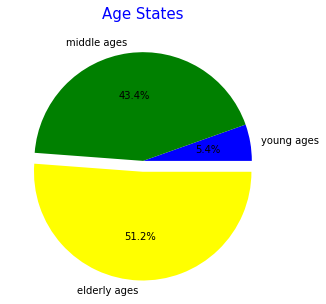

In [10]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

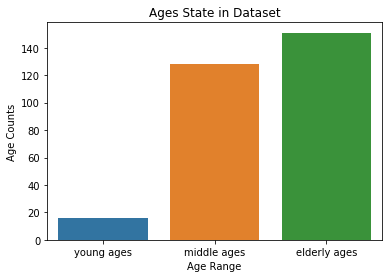

In [11]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

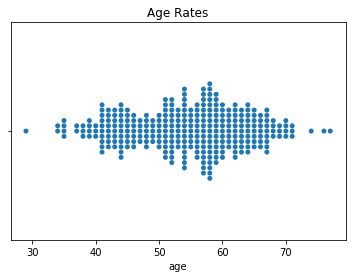

In [12]:
sns.swarmplot(x=heart.age)
plt.title('Age Rates')
plt.show()

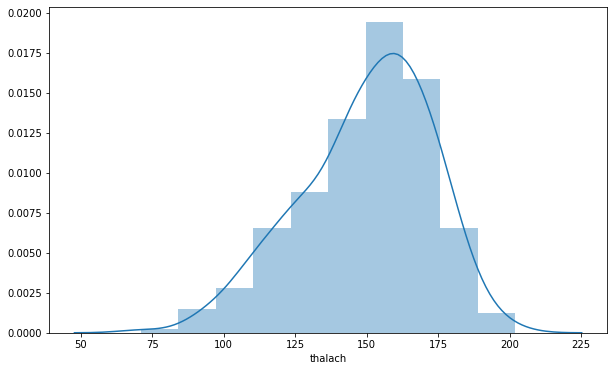

In [13]:
f, ax = plt.subplots(figsize=(10,6))
x = heart['thalach']
ax = sns.distplot(x, bins=10)
plt.show()

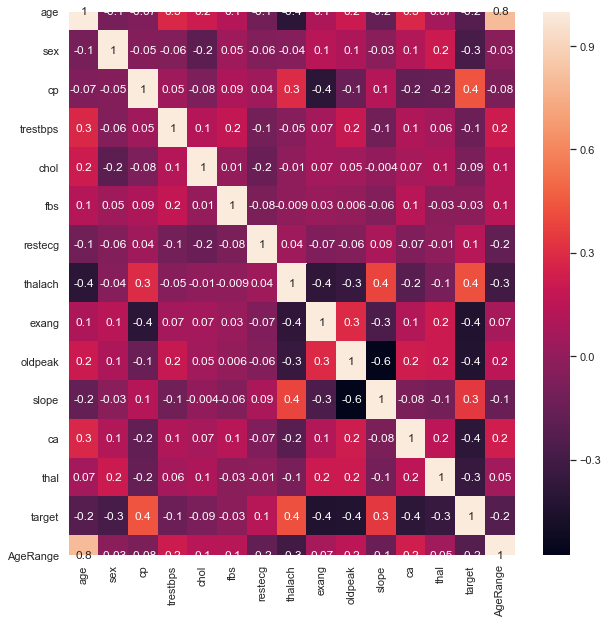

In [14]:
fig = plt.figure(figsize=(10, 10))
sns.set(style='white') 
sns.heatmap(heart.corr(), annot = True, fmt='.1g')

In [15]:
x=heart.drop(['target'],axis=1)

In [16]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,2
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,2


In [17]:
y=heart['target']

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
tree=DecisionTreeClassifier()

In [99]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
y_pred=tree.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
from sklearn.metrics import classification_report

In [104]:
accuracy_score(y_test,y_pred)

0.7631578947368421

In [105]:
confusion_matrix(y_test,y_pred)

array([[24,  8],
       [10, 34]], dtype=int64)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        32
           1       0.81      0.77      0.79        44

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76



In [107]:
x.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'AgeRange'],
      dtype='object')

In [108]:
heart.iloc[200]

age          44.0
sex           1.0
cp            0.0
trestbps    110.0
chol        197.0
fbs           0.0
restecg       0.0
thalach     177.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            1.0
thal          2.0
target        0.0
AgeRange      1.0
Name: 200, dtype: float64

In [109]:
tree.predict([[44.0,1.0,0.0,110.0,197.0,0.0,0.0,177.0,0.0,0.0,2.0,1.0,2.0,1.0]])

array([0], dtype=int64)

In [110]:
from sklearn.naive_bayes import MultinomialNB

In [111]:
NB=MultinomialNB()

In [112]:
NB.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [113]:
y_pred=NB.predict(x_test)

In [114]:
accuracy_score(y_test,y_pred)

0.7105263157894737

In [95]:
confusion_matrix(y_test,y_pred)

array([[21, 11],
       [11, 33]], dtype=int64)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        32
           1       0.75      0.75      0.75        44

    accuracy                           0.71        76
   macro avg       0.70      0.70      0.70        76
weighted avg       0.71      0.71      0.71        76



In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knn=KNeighborsClassifier(n_neighbors=3)

In [117]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [118]:
y_pred=knn.predict(x_test)

In [119]:
accuracy_score(y_test,y_pred)

0.631578947368421

In [54]:
heart.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'AgeRange'],
      dtype='object')

In [55]:
confusion_matrix(y_test,y_pred)

array([[29, 30],
       [14, 49]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.57        59
           1       0.62      0.78      0.69        63

    accuracy                           0.64       122
   macro avg       0.65      0.63      0.63       122
weighted avg       0.65      0.64      0.63       122



In [58]:
NB.predict([[44.0,1.0,0.0,110.0,197.0,0.0,0.0,177.0,0.0,0.0,2.0,1.0,2.0,1.0]])

array([1], dtype=int64)

In [120]:
data=pd.DataFrame({"Algorithm":["Decisiontree","NavieBayes",'KNN'],
                  "Accuracy":[0.76,0.71,0.63]})

In [121]:
data

,Algorithm,Accuracy
0,Decisiontree,0.76
1,NavieBayes,0.71
2,KNN,0.63


In [122]:
X=['Decisiontree','Naviebayes','KNN']
Y=[0.74,0.80,0.63]

Text(0.5, 1.0, 'Comparison Of Accuracy For Different Algorithms ')

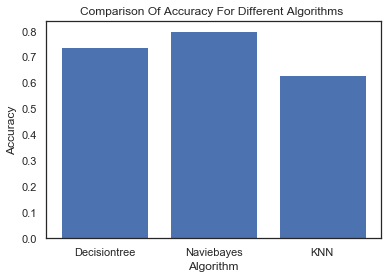

In [123]:
ax=plt.bar(X,Y)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison Of Accuracy For Different Algorithms ')

Text(0.5, 1.0, 'Comparison Of Accuracy For Different Algorithms ')

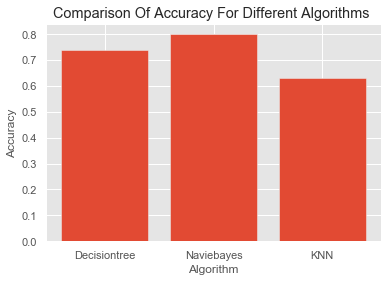

In [124]:
plt.style.use('ggplot')
ax=plt.bar(X,Y)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison Of Accuracy For Different Algorithms ')